# Import Modules and Path to Utilities

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import math
from os.path import abspath
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams['text.latex.unicode']=False
import datetime
from operator import add
import pickle
from sklearn.impute import SimpleImputer as Imputer
from osgeo import gdal
import xarray as xr
from affine import Affine
# import richdem as rd

imp = Imputer(strategy='mean')

# --------------------- #
# Lets Rips Some Treads #
# --------------------- #

from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()


if abspath('../utils/') not in sys.path:
    sys.path.append(abspath('../utils/'))
from utils import GetExtent

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  # Remove the CWD from sys.path while we load stuff.


### Define file path to files

In [2]:
# from config import site_name
SITENAME = 'tuolumne'
name = 'snowdepth'
formato = 'tifs'
YEAR = '2015'
path_to_data = f'/srv/shared/deep_stac/data/{name}/{formato}/{YEAR}'
files = os.listdir(path_to_data)

In [3]:
data = {}
nx = {}
ny = {}
x = {}
y = {}
ext = {}

f = files[0]
print('Loading: {0}'.format(f))
llave = f.split('_')[0]
data[llave] = xr.open_rasterio(
        os.path.join(
            path_to_data, f
        )
)
transform = Affine.from_gdal(*data[llave].attrs['transform'])
nx[llave], ny[llave] = data[llave].sizes['x'], data[llave].sizes['y']
x[llave], y[llave] = np.meshgrid(np.arange(nx[llave])+0.5, np.arange(ny[llave])+0.5) * transform

Loading: 20150427_SUPERsnow_depth_3m_int.tif


In [ ]:
data = {}
ext = {}
for f in files: 
    print('Loading: {0}'.format(f))
    llave = f.split('_')[0]
    ds = gdal.Open(
            os.path.join(
                path_to_data, f
            ), gdal.GA_ReadOnly
        )
    rb = ds.GetRasterBand(1)
    data[llave] = rb.ReadAsArray()
    data[llave] = np.where(data[llave]==None, np.nan, data[llave])
    data[llave] = np.divide(data[llave],100)
    gt=ds.GetGeoTransform()
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    ext[llave] = GetExtent(gt,cols,rows)

Loading: 20150427_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading: 20150409_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading: 20150306_SUPERsnow_depth_3m_int.tif
254007.0 4230330.0
254007.0 4179324.0
306714.0 4179324.0
306714.0 4230330.0
Loading: 20150403_SUPERsnow_depth_3m_int.tif


In [ ]:
ix = 1
llaves = list(np.sort(list(data.keys())))
plt.figure(figsize=(10,18))
for llave in llaves:
    ax = plt.subplot(3,2,ix)
    try:
        cmap = 'jet'

        im = ax.imshow(
            data[llave],
            extent=[
                ext[llave][0][0] - 3,
                ext[llave][2][0] - 3,
                ext[llave][1][1] - 3,
                ext[llave][0][1] - 3
            ],
            cmap=cmap
        )
        plt.title(llave)
        if ix < 9:
            plt.gca().axes.get_yaxis().set_visible(False)
            plt.gca().axes.get_xaxis().set_visible(False)
        else:
            plt.xlabel('UTME')
            plt.ylabel('UTMN')
        cbar = plt.colorbar()
        plt.subplots_adjust(left=None, bottom=None, right=None, wspace=None, hspace=0.25)
        ix = ix + 1
    except:
        print('Unable to Plot: {0}'.format(llave))

In [6]:
llave

'20150427'

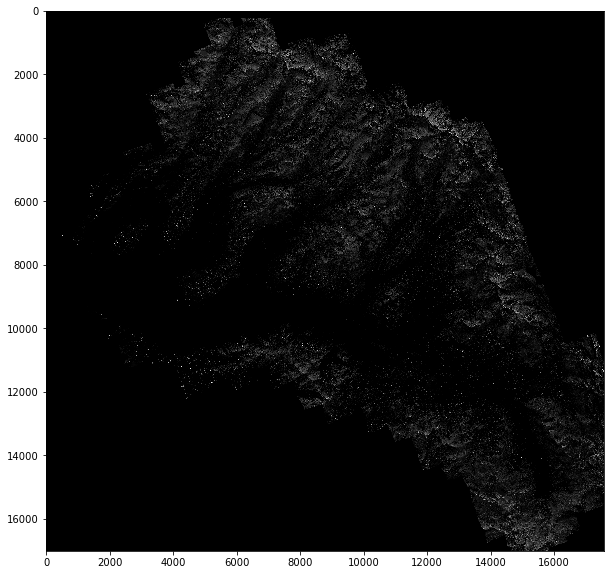

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10,18))
llave = '20150427'
im = plt.imshow(
    data[llave].squeeze(axis=0),
    cmap='gray'
)
plt.colorbar()
plt.show()


In [ ]:
ix